<h1>UN Data Exploration</h1>
## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:
 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top tly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [4]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv.csv')

In [5]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [6]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [9]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [11]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [12]:
print(gdp_df['Country'].dtype)

object


In [13]:
print(gdp_df['Year'].dtype)

int64


In [14]:
print(gdp_df['GDP_Per_Capita'].dtype)

float64


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [16]:
gdp_df.value_counts('Year')

Year
2013    242
2020    242
2019    242
2018    242
2017    242
2016    242
2015    242
2014    242
2021    241
2011    240
2012    240
2010    239
2009    239
2008    238
2007    237
2006    237
2005    236
2004    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [18]:
gdp_df.value_counts('Country').count()

242

242 Countries

In [20]:
gdp_df.value_counts('Country')

Country
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: count, Length: 242, dtype: int64

Kosovo,                                                
Sint Maarten (Dutch part,)                            4
Turks and Caicos Islan,ds                            12
Soma,lia                 10
Djib<br>
All have low population counts and weaker economies, leading to a lower GDP  10

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_20121`.

In [23]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]

In [24]:
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782
...,...,...,...
7502,Viet Nam,2021,10628.219166
7535,West Bank and Gaza,2021,5641.044400
7564,World,2021,17055.357429
7597,Zambia,2021,3236.788981


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [26]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

(array([110.,  59.,  23.,  21.,  13.,   8.,   3.,   0.,   2.,   2.]),
 array([   714.06671238,  12211.00941197,  23707.95211155,  35204.89481114,
         46701.83751073,  58198.78021032,  69695.72290991,  81192.6656095 ,
         92689.60830909, 104186.55100868, 115683.49370826]),
 <BarContainer object of 10 artists>)

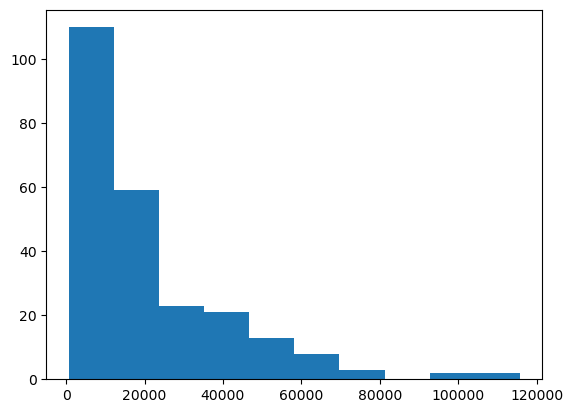

In [28]:
plt.hist(gdp_2021['GDP_Per_Capita'], bins = 10)

The shape is very much right skewed

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [31]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515
...,...,...,...
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [33]:
gdp_pivoted = gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1517.016266,NaN
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205493,4047.128488,3916.925775,4294.746098,4786.480236,5052.064072,...,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6245.448697,5402.538773,5641.044400,5722.409175
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


In [34]:
gdp_pivoted = gdp_pivoted[(gdp_pivoted[1990] != 0) & (gdp_pivoted[2021] != 0)]

In [35]:
gdp_pivoted = gdp_pivoted.dropna(subset = [1990, 2021])

In [36]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2897.564287,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,2785.903860
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [38]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2021]-gdp_pivoted[1990])/gdp_pivoted[1990]

In [39]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370,15.865334
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691,43.980435
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931,202.379544
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303,24.921232
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677,2.049878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,2785.903860,0.950043
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469,406.251608
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316,75.720074


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [41]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0 ]


Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Barbados,14097.395550,13519.721406,12710.419327,12772.787194,12993.923523,13225.754385,13726.032320,14353.120119,14864.666058,14884.601843,...,15441.219761,15789.451218,16156.517559,16198.962160,16003.857426,15954.802665,13805.777541,13754.802423,15106.775175,-2.430187
Brunei,70358.724094,70439.053204,71781.102896,70154.424727,70570.964514,71966.097409,72320.987984,69660.186006,67770.172490,68366.663177,...,63131.186248,62170.087023,59980.988745,60173.051134,59650.231527,61424.364313,61603.550804,60127.023689,58669.900768,-14.542192
Burundi,1175.155086,1209.388158,1190.067435,1153.541309,1103.167298,956.490976,880.309412,867.284265,891.699844,862.006680,...,831.294839,781.579287,764.336602,750.787616,740.448223,729.658463,711.355263,714.066712,708.178317,-39.236385
Central African Republic,1200.613390,1157.381663,1049.119415,1019.441006,1036.283901,1080.770061,1010.743889,1035.107458,1054.312973,1062.298258,...,765.259554,795.037019,818.395995,839.600009,854.647491,861.766789,847.765012,837.504686,819.192343,-30.243599
Congo,5007.319245,4986.699205,4978.350838,4790.461157,4400.020297,4453.430838,4522.008454,4402.408095,4470.347075,4240.155997,...,5319.387249,5009.432267,4363.753925,4073.926085,3786.412000,3695.061694,3384.654335,3234.392972,3210.403567,-35.406695
Dem. Rep. Congo,1750.169739,1550.763705,1346.747222,1128.593145,1034.123387,998.688314,969.808663,900.967796,865.606612,805.277881,...,999.072134,1032.571865,1021.327198,1023.539833,1048.246447,1059.892111,1044.071214,1073.643271,1132.654233,-38.654906
Fragile and conflict affected situations,4864.814075,4350.885189,4111.205699,3783.352920,3333.698724,3152.588947,3105.770527,3149.284983,3218.818872,3245.559989,...,4563.187603,4518.143936,4563.257454,4600.657232,4636.533677,4647.290257,4357.621312,4333.881033,4195.197218,-10.913738
Gabon,17559.006114,18134.816076,17109.401561,17318.162261,17497.649823,17903.782156,18091.047292,18655.653044,18825.361170,16716.372068,...,14785.398669,14892.035790,14783.078117,14478.130305,14254.461697,14478.001722,13903.288955,13814.495200,13949.155147,-21.325301
Guinea-Bissau,1998.173206,2057.174302,2020.741837,1997.076379,1998.836536,2035.223783,2224.748653,2324.843826,1641.030749,1627.075350,...,1690.091136,1748.029233,1811.300971,1872.309281,1851.886546,1890.533103,1803.630591,1831.383229,1855.111973,-8.347123


19 Countries for the 19 rows

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.


In [44]:
gdp_pivoted.sort_values('Percent_Change', ascending = False).head(2)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,936.419751,893.097341,1159.738622,1240.908573,1394.786465,1578.049440,2530.198770,6084.623075,7242.224926,8749.425868,...,28106.198389,24563.500604,21566.057048,19617.844705,17764.969630,16240.369810,15132.379974,14637.007350,14732.917816,1463.081870
China,1423.896348,1534.705272,1731.657215,1949.534268,2178.924057,2391.477116,2601.363426,2812.711135,3004.427342,3206.730026,...,11851.404218,12612.351651,13399.137320,14243.532611,15133.995618,15977.763828,16296.609379,17657.495181,18187.978737,1140.082904


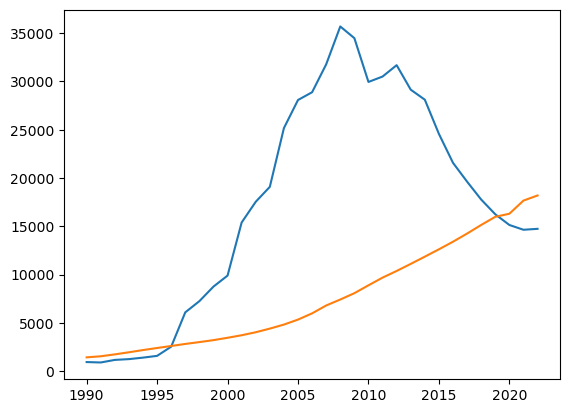

In [45]:
E_G = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea']
China = gdp_df.loc[gdp_df['Country'] == 'China']
plt.plot(E_G['Year'], E_G['GDP_Per_Capita'])
plt.plot(China['Year'], China['GDP_Per_Capita'])
plt.show()

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [47]:
continents = pd.read_csv('data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [49]:
gdp_df = pd.merge(gdp_df, continents, on = 'Country', how = 'left')

In [50]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,Africa
7658,Zimbabwe,1993,2458.783255,Africa
7659,Zimbabwe,1992,2468.278257,Africa
7660,Zimbabwe,1991,2781.787843,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.

In [52]:
grouped_country = gdp_df.drop_duplicates('Country')
grouped_country['Continent'].value_counts()

Continent
Africa           50
Europe           44
Asia             41
North America    26
Oceania          14
South America    11
Name: count, dtype: int64

In [53]:
y_height = pd.DataFrame(grouped_country['Continent'].value_counts()).reset_index()
y_height

,Continent,count
0,Africa,50
1,Europe,44
2,Asia,41
3,North America,26
4,Oceania,14
5,South America,11


<BarContainer object of 6 artists>

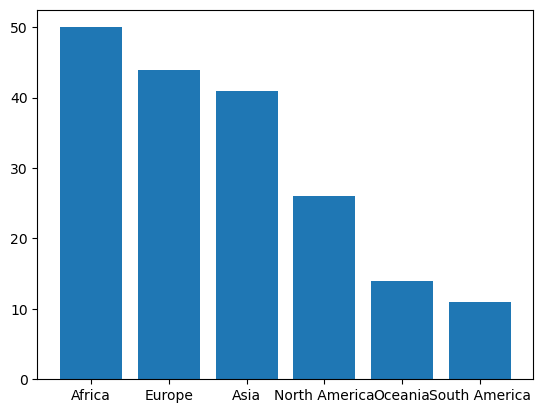

In [54]:
country_string = (gdp_df['Country']).astype(str)
plt.bar(x = y_height['Continent'], height = y_height['count'])

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

<Axes: xlabel='Continent', ylabel='GDP_Per_Capita'>

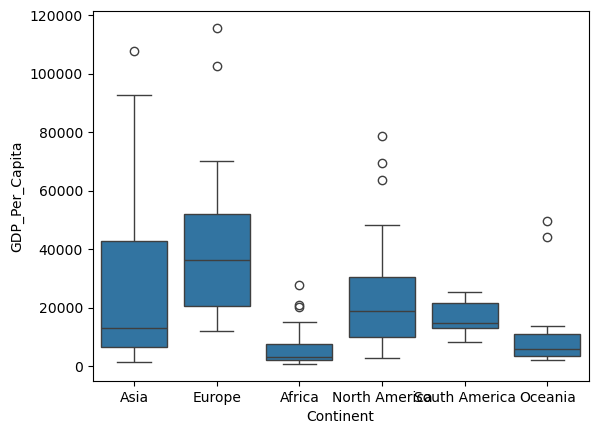

In [56]:
gdp_2021 = pd.merge(gdp_2021, continents, on = 'Country', how = 'left' )
sns.boxplot(gdp_2021, x ='Continent', y = 'GDP_Per_Capita' )


21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.


In [58]:
life_expectancy= pd.read_csv('../un-exploration-GetGubbz/data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', skiprows = 4)

In [59]:
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [61]:
life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 68'], axis = 1)
life_expectancy

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,63.323000,63.653000,63.935000,...,78.880000,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,36.097000,36.866000,37.796000,...,67.384000,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,54.391000,54.626000,54.876000,...,63.380000,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,50.679000,50.802000,50.856000,...,60.699000,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN


In [62]:
year_headers = life_expectancy.columns.tolist()
year_headers = year_headers[1:]

In [63]:
life_expectancy_melted = life_expectancy.melt(id_vars = 'Country Name', value_vars = year_headers).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'Life Expectancy'})
life_expectancy_melted['Year'] = life_expectancy_melted['Year'].astype(np.int64)
life_expectancy_melted

,Country,Year,Life Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,NaN
17022,Zambia,2023,NaN


In [65]:
life_expectancy_melted.loc[life_expectancy_melted['Life Expectancy'] > 80].sort_values(by = 'Life Expectancy', ascending = True).head(1)

,Country,Year,Life Expectancy
15600,New Caledonia,2018,80.003098


24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [67]:
gdp_le = pd.merge(gdp_df, life_expectancy_melted, how = 'inner', on = ['Year', 'Country'] )
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
7052,Zimbabwe,1994,2670.106615,Africa,52.588
7053,Zimbabwe,1993,2458.783255,Africa,54.426
7054,Zimbabwe,1992,2468.278257,Africa,56.435
7055,Zimbabwe,1991,2781.787843,Africa,58.091


25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

In [69]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982000
21,Africa Eastern and Southern,2021,3519.174840,NaN,62.454590
54,Africa Western and Central,2021,4014.607965,NaN,56.988657
87,Albania,2021,14595.944386,Europe,76.463000
120,Algeria,2021,11029.138782,Africa,76.377000
...,...,...,...,...,...
6897,Viet Nam,2021,10628.219166,NaN,73.618000
6930,West Bank and Gaza,2021,5641.044400,Asia,73.473000
6959,World,2021,17055.357429,NaN,71.327157
6992,Zambia,2021,3236.788981,Africa,61.223000


In [70]:
gdp_le_2021[gdp_le_2021['Life Expectancy'] >= 80]

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
350,Australia,2021,49774.340702,Oceania,83.300000
383,Austria,2021,54121.145542,Europe,81.190244
581,Belgium,2021,51823.507530,Europe,81.790244
1068,Canada,2021,48218.038316,North America,81.587073
1133,Cayman Islands,2021,69400.666661,North America,82.009756
1442,Cyprus,2021,41694.257812,Europe,81.203000
1508,Denmark,2021,57962.654094,Europe,81.404878
1909,Euro area,2021,46357.187214,NaN,81.594947
2008,European Union,2021,44185.788486,NaN,80.316613
2074,Finland,2021,48713.291489,Europe,81.885366


In [71]:
len(gdp_le_2021[gdp_le_2021['Life Expectancy'] >= 80])

33

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [73]:
gdp_le_2021.sort_values('GDP_Per_Capita', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
3795,Luxembourg,2021,115683.493708,Europe,82.597561
5634,Singapore,2021,107741.118436,Asia,83.092683
2992,Ireland,2021,102785.490239,Europe,82.353659


In [74]:
three_largest = gdp_le[(gdp_le['Country'] == 'Luxembourg') | (gdp_le['Country'] == 'Singapore') | (gdp_le['Country'] == 'Ireland')]
three_largest

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2991,Ireland,2022,113870.785550,Europe,83.056098
2992,Ireland,2021,102785.490239,Europe,82.353659
2993,Ireland,2020,91356.855054,Europe,82.556098
2994,Ireland,2019,86925.906582,Europe,82.702439
2995,Ireland,2018,83575.599241,Europe,82.204878
...,...,...,...,...,...
5661,Singapore,1994,46865.416894,Asia,76.197561
5662,Singapore,1993,43528.860736,Asia,76.046341
5663,Singapore,1992,40054.049796,Asia,75.946341
5664,Singapore,1991,38705.653871,Asia,75.646341


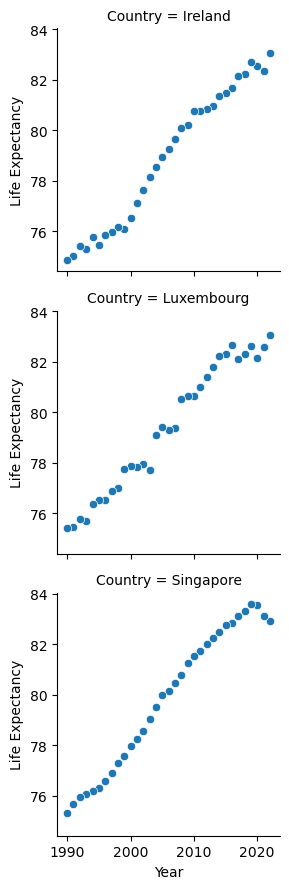

In [126]:
sns.FacetGrid(three_largest, row = 'Country').map(sns.scatterplot,'Year','Life Expectancy')

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

<Axes: xlabel='Life Expectancy', ylabel='GDP_Per_Capita'>

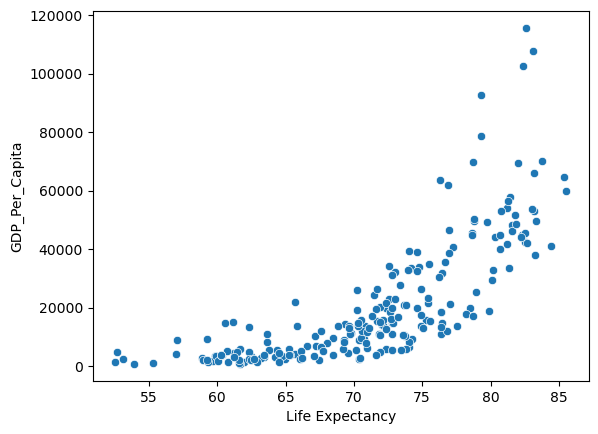

In [129]:
sns.scatterplot(gdp_le_2021, x='Life Expectancy', y='GDP_Per_Capita')

The higher the life expectancy the higher the GDP, but the graph rises exponentially so life expectancy has to increase substantially before that point.

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [138]:
gdp_le_2021[['GDP_Per_Capita', 'Life Expectancy']].corr()

,GDP_Per_Capita,Life Expectancy
GDP_Per_Capita,1.000000,0.755376
Life Expectancy,0.755376,1.000000


29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [136]:
gdp_le_2021['log_GDP_Per_Capita'] = gdp_le_2021['GDP_Per_Capita'].apply(np.log)

C:\Users\Gubbz\AppData\Local\Temp\ipykernel_173884\37454377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['log_GDP_Per_Capita'] = gdp_le_2021['GDP_Per_Capita'].apply(np.log)
